In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
amritsar_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Amritsar.csv', skiprows = 2, delimiter=',')
amritsar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,5.9,99,0.0,989.2,4.2,10.3,340,335
1,2024-01-01T01:00,7.3,99,0.0,990.2,4.7,7.2,360,354
2,2024-01-01T02:00,7.6,100,0.0,990.7,4.4,6.1,9,357
3,2024-01-01T03:00,8.1,99,0.0,991.3,4.2,4.7,20,4
4,2024-01-01T04:00,8.6,99,0.0,991.8,3.5,3.7,24,11
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.8,100,0.0,991.0,4.7,12.4,288,292
8780,2024-12-31T20:00,7.1,99,0.0,990.6,6.6,14.3,291,297
8781,2024-12-31T21:00,7.2,100,0.0,990.3,5.9,16.3,297,304
8782,2024-12-31T22:00,6.6,99,0.0,990.0,6.9,18.3,323,317


In [3]:
amritsar_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Amritsar.csv', delimiter= ',')
amritsar_pollutants['Timestamp'] = amritsar_meteo['time']
amritsar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
amritsar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,114.78,266.94,13.77,17.32,31.10,34.40,9.16,0.29,29.46,...,NaN,NaN,99.12,0.42,185.54,NaN,NaN,177.98,NaN,NaN
1,2024-01-01T01:00,108.19,250.47,13.47,17.65,31.12,34.28,7.68,0.23,27.09,...,NaN,NaN,99.30,0.38,211.96,NaN,NaN,178.27,NaN,NaN
2,2024-01-01T02:00,94.05,215.13,13.17,18.40,31.57,34.27,7.06,0.20,27.92,...,NaN,NaN,99.82,0.36,210.41,NaN,NaN,177.98,NaN,NaN
3,2024-01-01T03:00,79.48,178.71,12.60,18.48,31.08,34.41,7.22,0.21,29.26,...,NaN,NaN,99.56,0.36,196.79,NaN,NaN,177.50,NaN,NaN
4,2024-01-01T04:00,65.53,143.83,13.79,17.86,31.66,34.25,7.93,0.24,33.48,...,NaN,NaN,99.66,0.40,188.72,NaN,NaN,177.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,86.44,191.38,8.95,14.56,21.95,30.26,12.13,0.85,NaN,...,NaN,NaN,65.82,0.36,183.84,NaN,NaN,109.52,NaN,NaN
8780,2024-12-31T20:00,96.78,222.32,11.32,14.88,25.55,30.94,10.86,0.76,NaN,...,NaN,NaN,65.74,0.36,193.35,NaN,NaN,122.30,NaN,NaN
8781,2024-12-31T21:00,86.97,212.22,11.94,13.67,25.38,31.39,11.76,0.82,NaN,...,NaN,NaN,65.46,0.38,199.86,NaN,NaN,123.45,NaN,NaN
8782,2024-12-31T22:00,77.88,202.25,9.70,14.10,23.80,30.01,12.74,0.89,NaN,...,NaN,NaN,65.63,0.48,178.58,NaN,NaN,123.52,NaN,NaN


In [4]:
amritsar = pd.merge(amritsar_meteo.iloc[:, :], amritsar_pollutants.iloc[:, 0:3], on='time')
amritsar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,5.9,99,0.0,989.2,4.2,10.3,340,335,114.78,266.94
1,2024-01-01T01:00,7.3,99,0.0,990.2,4.7,7.2,360,354,108.19,250.47
2,2024-01-01T02:00,7.6,100,0.0,990.7,4.4,6.1,9,357,94.05,215.13
3,2024-01-01T03:00,8.1,99,0.0,991.3,4.2,4.7,20,4,79.48,178.71
4,2024-01-01T04:00,8.6,99,0.0,991.8,3.5,3.7,24,11,65.53,143.83
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.8,100,0.0,991.0,4.7,12.4,288,292,86.44,191.38
8780,2024-12-31T20:00,7.1,99,0.0,990.6,6.6,14.3,291,297,96.78,222.32
8781,2024-12-31T21:00,7.2,100,0.0,990.3,5.9,16.3,297,304,86.97,212.22
8782,2024-12-31T22:00,6.6,99,0.0,990.0,6.9,18.3,323,317,77.88,202.25


In [5]:
amritsar['city'] = 'Amritsar'
amritsar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,5.9,99,0.0,989.2,4.2,10.3,340,335,114.78,266.94,Amritsar
1,2024-01-01T01:00,7.3,99,0.0,990.2,4.7,7.2,360,354,108.19,250.47,Amritsar
2,2024-01-01T02:00,7.6,100,0.0,990.7,4.4,6.1,9,357,94.05,215.13,Amritsar
3,2024-01-01T03:00,8.1,99,0.0,991.3,4.2,4.7,20,4,79.48,178.71,Amritsar
4,2024-01-01T04:00,8.6,99,0.0,991.8,3.5,3.7,24,11,65.53,143.83,Amritsar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.8,100,0.0,991.0,4.7,12.4,288,292,86.44,191.38,Amritsar
8780,2024-12-31T20:00,7.1,99,0.0,990.6,6.6,14.3,291,297,96.78,222.32,Amritsar
8781,2024-12-31T21:00,7.2,100,0.0,990.3,5.9,16.3,297,304,86.97,212.22,Amritsar
8782,2024-12-31T22:00,6.6,99,0.0,990.0,6.9,18.3,323,317,77.88,202.25,Amritsar


In [6]:
amritsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8384 non-null   float64
 10  PM10 (µg/m³)              8406 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
amritsar = amritsar.interpolate()
amritsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    amritsar[delay1_col] = amritsar[col].shift(1)
    delay2_col = col + "_delay2"
    amritsar[delay2_col] = amritsar[col].shift(2)
    amritsar.loc[0, delay1_col] = amritsar[col].iloc[-1]
    amritsar.loc[1, delay2_col] = amritsar[col].iloc[-1]
    amritsar.loc[0, delay2_col] = amritsar[col].iloc[-2]

amritsar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,5.9,99,0.0,989.2,4.2,10.3,340,335,114.78,266.94,Amritsar,70.33,77.88,195.47,202.25
1,2024-01-01T01:00,7.3,99,0.0,990.2,4.7,7.2,360,354,108.19,250.47,Amritsar,114.78,70.33,266.94,195.47
2,2024-01-01T02:00,7.6,100,0.0,990.7,4.4,6.1,9,357,94.05,215.13,Amritsar,108.19,114.78,250.47,266.94
3,2024-01-01T03:00,8.1,99,0.0,991.3,4.2,4.7,20,4,79.48,178.71,Amritsar,94.05,108.19,215.13,250.47
4,2024-01-01T04:00,8.6,99,0.0,991.8,3.5,3.7,24,11,65.53,143.83,Amritsar,79.48,94.05,178.71,215.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.8,100,0.0,991.0,4.7,12.4,288,292,86.44,191.38,Amritsar,16.76,23.44,64.58,48.55
8780,2024-12-31T20:00,7.1,99,0.0,990.6,6.6,14.3,291,297,96.78,222.32,Amritsar,86.44,16.76,191.38,64.58
8781,2024-12-31T21:00,7.2,100,0.0,990.3,5.9,16.3,297,304,86.97,212.22,Amritsar,96.78,86.44,222.32,191.38
8782,2024-12-31T22:00,6.6,99,0.0,990.0,6.9,18.3,323,317,77.88,202.25,Amritsar,86.97,96.78,212.22,222.32


In [9]:
bathinda_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Bathinda.csv', skiprows=2, delimiter=',')
bathinda_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,5.3,99,0.0,992.1,2.9,8.0,7,8
1,2024-01-01T01:00,6.1,97,0.0,993.1,2.6,5.2,56,34
2,2024-01-01T02:00,6.1,93,0.0,993.5,3.9,6.6,56,41
3,2024-01-01T03:00,5.9,97,0.0,994.1,3.4,7.4,72,51
4,2024-01-01T04:00,7.6,98,0.0,994.9,3.7,3.4,61,58
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.6,98,0.0,993.6,0.6,2.9,342,7
8780,2024-12-31T20:00,6.8,100,0.0,993.4,2.7,5.6,340,333
8781,2024-12-31T21:00,7.1,100,0.0,993.3,5.6,10.7,329,327
8782,2024-12-31T22:00,6.7,100,0.0,993.2,6.3,14.4,336,331


In [10]:
bathinda_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Bathinda.csv', delimiter= ',')
bathinda_pollutants['Timestamp'] = bathinda_meteo['time']
bathinda_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bathinda_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,112.24,220.81,25.39,27.44,49.33,NaN,30.48,0.20,NaN,...,NaN,NaN,70.11,1.01,166.80,NaN,0.0,3.45,917.63,NaN
1,2024-01-01T01:00,103.82,206.38,24.86,26.09,48.25,NaN,30.90,1.31,NaN,...,NaN,NaN,70.11,1.26,102.08,NaN,0.0,3.63,917.62,NaN
2,2024-01-01T02:00,102.64,199.73,25.58,25.61,48.03,NaN,22.31,3.04,NaN,...,NaN,NaN,70.11,1.22,137.92,NaN,0.0,3.85,917.78,NaN
3,2024-01-01T03:00,97.12,190.02,24.82,27.11,48.75,NaN,19.28,0.48,NaN,...,NaN,NaN,70.11,1.10,174.64,NaN,0.0,3.74,917.70,NaN
4,2024-01-01T04:00,90.63,175.96,24.92,25.85,48.17,NaN,17.31,0.66,NaN,...,NaN,NaN,70.12,1.88,348.82,NaN,0.0,3.69,917.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [11]:
bathinda = pd.merge(bathinda_meteo.iloc[:, :], bathinda_pollutants.iloc[:, 0:3], on='time')
bathinda

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,5.3,99,0.0,992.1,2.9,8.0,7,8,112.24,220.81
1,2024-01-01T01:00,6.1,97,0.0,993.1,2.6,5.2,56,34,103.82,206.38
2,2024-01-01T02:00,6.1,93,0.0,993.5,3.9,6.6,56,41,102.64,199.73
3,2024-01-01T03:00,5.9,97,0.0,994.1,3.4,7.4,72,51,97.12,190.02
4,2024-01-01T04:00,7.6,98,0.0,994.9,3.7,3.4,61,58,90.63,175.96
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.6,98,0.0,993.6,0.6,2.9,342,7,NaN,NaN
8780,2024-12-31T20:00,6.8,100,0.0,993.4,2.7,5.6,340,333,NaN,NaN
8781,2024-12-31T21:00,7.1,100,0.0,993.3,5.6,10.7,329,327,NaN,NaN
8782,2024-12-31T22:00,6.7,100,0.0,993.2,6.3,14.4,336,331,NaN,NaN


In [12]:
bathinda['city'] = 'Bathinda'
bathinda

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,5.3,99,0.0,992.1,2.9,8.0,7,8,112.24,220.81,Bathinda
1,2024-01-01T01:00,6.1,97,0.0,993.1,2.6,5.2,56,34,103.82,206.38,Bathinda
2,2024-01-01T02:00,6.1,93,0.0,993.5,3.9,6.6,56,41,102.64,199.73,Bathinda
3,2024-01-01T03:00,5.9,97,0.0,994.1,3.4,7.4,72,51,97.12,190.02,Bathinda
4,2024-01-01T04:00,7.6,98,0.0,994.9,3.7,3.4,61,58,90.63,175.96,Bathinda
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.6,98,0.0,993.6,0.6,2.9,342,7,NaN,NaN,Bathinda
8780,2024-12-31T20:00,6.8,100,0.0,993.4,2.7,5.6,340,333,NaN,NaN,Bathinda
8781,2024-12-31T21:00,7.1,100,0.0,993.3,5.6,10.7,329,327,NaN,NaN,Bathinda
8782,2024-12-31T22:00,6.7,100,0.0,993.2,6.3,14.4,336,331,NaN,NaN,Bathinda


In [13]:
bathinda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7848 non-null   float64
 10  PM10 (µg/m³)              6762 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
bathinda = bathinda.interpolate()
bathinda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bathinda[delay1_col] = bathinda[col].shift(1)
    delay2_col = col + "_delay2"
    bathinda[delay2_col] = bathinda[col].shift(2)
    bathinda.loc[0, delay1_col] = bathinda[col].iloc[-1]
    bathinda.loc[1, delay2_col] = bathinda[col].iloc[-1]
    bathinda.loc[0, delay2_col] = bathinda[col].iloc[-2]

bathinda

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,5.3,99,0.0,992.1,2.9,8.0,7,8,112.24,220.81,Bathinda,47.77,47.77,128.13,128.13
1,2024-01-01T01:00,6.1,97,0.0,993.1,2.6,5.2,56,34,103.82,206.38,Bathinda,112.24,47.77,220.81,128.13
2,2024-01-01T02:00,6.1,93,0.0,993.5,3.9,6.6,56,41,102.64,199.73,Bathinda,103.82,112.24,206.38,220.81
3,2024-01-01T03:00,5.9,97,0.0,994.1,3.4,7.4,72,51,97.12,190.02,Bathinda,102.64,103.82,199.73,206.38
4,2024-01-01T04:00,7.6,98,0.0,994.9,3.7,3.4,61,58,90.63,175.96,Bathinda,97.12,102.64,190.02,199.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.6,98,0.0,993.6,0.6,2.9,342,7,47.77,128.13,Bathinda,47.77,47.77,128.13,128.13
8780,2024-12-31T20:00,6.8,100,0.0,993.4,2.7,5.6,340,333,47.77,128.13,Bathinda,47.77,47.77,128.13,128.13
8781,2024-12-31T21:00,7.1,100,0.0,993.3,5.6,10.7,329,327,47.77,128.13,Bathinda,47.77,47.77,128.13,128.13
8782,2024-12-31T22:00,6.7,100,0.0,993.2,6.3,14.4,336,331,47.77,128.13,Bathinda,47.77,47.77,128.13,128.13


In [16]:
jalandhar_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Jalandhar.csv', skiprows=2, delimiter=',')
jalandhar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.2,94,0.0,989.7,4.3,8.5,318,332
1,2024-01-01T01:00,8.4,98,0.0,990.5,3.8,5.2,311,326
2,2024-01-01T02:00,8.5,99,0.0,990.9,2.9,3.5,300,336
3,2024-01-01T03:00,8.8,99,0.0,991.5,3.3,3.1,283,315
4,2024-01-01T04:00,9.5,97,0.0,991.9,3.8,3.9,311,338
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,98,0.0,990.9,4.5,10.5,277,305
8780,2024-12-31T20:00,6.6,100,0.0,990.7,5.6,15.6,292,310
8781,2024-12-31T21:00,6.7,99,0.0,990.6,5.6,17.8,299,325
8782,2024-12-31T22:00,6.8,99,0.0,990.4,5.1,15.5,342,342


In [17]:
jalandhar_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Jalandhar.csv', delimiter= ',')
jalandhar_pollutants['Timestamp'] = jalandhar_meteo['time']
jalandhar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
jalandhar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,44.15,74.85,25.37,29.89,55.10,34.41,9.38,0.40,7.78,...,9.10,NaN,93.81,NaN,NaN,0.0,0.0,115.48,NaN,NaN
1,2024-01-01T01:00,37.43,71.48,25.46,29.65,54.86,34.34,9.09,0.37,7.22,...,9.08,NaN,93.76,NaN,NaN,0.0,0.0,112.52,NaN,NaN
2,2024-01-01T02:00,32.48,64.13,25.11,30.07,55.12,35.06,8.84,0.35,9.15,...,9.27,NaN,93.75,NaN,NaN,0.0,0.0,112.60,NaN,NaN
3,2024-01-01T03:00,30.37,58.99,24.63,29.93,55.46,35.55,8.66,0.33,8.94,...,9.40,NaN,93.75,NaN,NaN,0.0,0.0,113.40,NaN,NaN
4,2024-01-01T04:00,26.92,57.69,25.15,29.79,55.29,34.74,8.84,0.35,7.68,...,9.19,NaN,93.75,NaN,NaN,0.0,0.0,115.68,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,46.58,90.45,8.78,41.38,50.16,5.21,11.85,0.93,35.34,...,4.72,NaN,93.22,1.26,168.06,0.0,0.0,425.76,NaN,NaN
8780,2024-12-31T20:00,44.87,87.14,10.28,39.94,50.22,5.26,11.97,0.96,40.10,...,4.85,NaN,93.24,1.27,168.15,0.0,0.0,426.15,NaN,NaN
8781,2024-12-31T21:00,41.16,77.76,10.48,39.71,50.19,5.11,11.63,0.87,44.43,...,4.88,NaN,93.24,1.27,168.21,0.0,0.0,426.38,NaN,NaN
8782,2024-12-31T22:00,36.54,75.20,9.22,41.24,50.46,5.22,11.82,0.92,31.60,...,4.63,NaN,93.29,1.27,168.42,0.0,0.0,427.26,NaN,NaN


In [18]:
jalandhar = pd.merge(jalandhar_meteo.iloc[:, :], jalandhar_pollutants.iloc[:, 0:3], on='time')
jalandhar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.2,94,0.0,989.7,4.3,8.5,318,332,44.15,74.85
1,2024-01-01T01:00,8.4,98,0.0,990.5,3.8,5.2,311,326,37.43,71.48
2,2024-01-01T02:00,8.5,99,0.0,990.9,2.9,3.5,300,336,32.48,64.13
3,2024-01-01T03:00,8.8,99,0.0,991.5,3.3,3.1,283,315,30.37,58.99
4,2024-01-01T04:00,9.5,97,0.0,991.9,3.8,3.9,311,338,26.92,57.69
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,98,0.0,990.9,4.5,10.5,277,305,46.58,90.45
8780,2024-12-31T20:00,6.6,100,0.0,990.7,5.6,15.6,292,310,44.87,87.14
8781,2024-12-31T21:00,6.7,99,0.0,990.6,5.6,17.8,299,325,41.16,77.76
8782,2024-12-31T22:00,6.8,99,0.0,990.4,5.1,15.5,342,342,36.54,75.20


In [19]:
jalandhar['city'] = 'Jalandhar'
jalandhar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,8.2,94,0.0,989.7,4.3,8.5,318,332,44.15,74.85,Jalandhar
1,2024-01-01T01:00,8.4,98,0.0,990.5,3.8,5.2,311,326,37.43,71.48,Jalandhar
2,2024-01-01T02:00,8.5,99,0.0,990.9,2.9,3.5,300,336,32.48,64.13,Jalandhar
3,2024-01-01T03:00,8.8,99,0.0,991.5,3.3,3.1,283,315,30.37,58.99,Jalandhar
4,2024-01-01T04:00,9.5,97,0.0,991.9,3.8,3.9,311,338,26.92,57.69,Jalandhar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,98,0.0,990.9,4.5,10.5,277,305,46.58,90.45,Jalandhar
8780,2024-12-31T20:00,6.6,100,0.0,990.7,5.6,15.6,292,310,44.87,87.14,Jalandhar
8781,2024-12-31T21:00,6.7,99,0.0,990.6,5.6,17.8,299,325,41.16,77.76,Jalandhar
8782,2024-12-31T22:00,6.8,99,0.0,990.4,5.1,15.5,342,342,36.54,75.20,Jalandhar


In [20]:
jalandhar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8573 non-null   float64
 10  PM10 (µg/m³)              8566 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
jalandhar = jalandhar.interpolate()
jalandhar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    jalandhar[delay1_col] = jalandhar[col].shift(1)
    delay2_col = col + "_delay2"
    jalandhar[delay2_col] = jalandhar[col].shift(2)
    jalandhar.loc[0, delay1_col] = jalandhar[col].iloc[-1]
    jalandhar.loc[1, delay2_col] = jalandhar[col].iloc[-1]
    jalandhar.loc[0, delay2_col] = jalandhar[col].iloc[-2]

jalandhar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.2,94,0.0,989.7,4.3,8.5,318,332,44.15,74.85,Jalandhar,36.87,36.54,72.65,75.20
1,2024-01-01T01:00,8.4,98,0.0,990.5,3.8,5.2,311,326,37.43,71.48,Jalandhar,44.15,36.87,74.85,72.65
2,2024-01-01T02:00,8.5,99,0.0,990.9,2.9,3.5,300,336,32.48,64.13,Jalandhar,37.43,44.15,71.48,74.85
3,2024-01-01T03:00,8.8,99,0.0,991.5,3.3,3.1,283,315,30.37,58.99,Jalandhar,32.48,37.43,64.13,71.48
4,2024-01-01T04:00,9.5,97,0.0,991.9,3.8,3.9,311,338,26.92,57.69,Jalandhar,30.37,32.48,58.99,64.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,98,0.0,990.9,4.5,10.5,277,305,46.58,90.45,Jalandhar,43.31,45.77,88.88,87.69
8780,2024-12-31T20:00,6.6,100,0.0,990.7,5.6,15.6,292,310,44.87,87.14,Jalandhar,46.58,43.31,90.45,88.88
8781,2024-12-31T21:00,6.7,99,0.0,990.6,5.6,17.8,299,325,41.16,77.76,Jalandhar,44.87,46.58,87.14,90.45
8782,2024-12-31T22:00,6.8,99,0.0,990.4,5.1,15.5,342,342,36.54,75.20,Jalandhar,41.16,44.87,77.76,87.14


In [23]:
khanna_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Khanna.csv', skiprows=2, delimiter = ',')
khanna_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,7.6,100,0.0,986.5,6.5,10.8,341,334
1,2024-01-01T01:00,7.8,99,0.0,987.7,3.7,5.2,349,348
2,2024-01-01T02:00,8.0,99,0.0,988.2,2.2,3.8,360,343
3,2024-01-01T03:00,8.6,98,0.0,988.5,3.2,3.7,360,349
4,2024-01-01T04:00,9.2,98,0.0,988.9,3.7,4.4,349,351
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.6,100,0.0,987.5,5.6,13.4,301,310
8780,2024-12-31T20:00,7.7,99,0.0,987.3,8.7,19.4,312,311
8781,2024-12-31T21:00,8.2,99,0.0,987.2,10.8,23.1,322,320
8782,2024-12-31T22:00,7.7,100,0.0,987.2,11.3,23.5,321,325


In [24]:
khanna_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Khanna.csv', delimiter= ',')
khanna_pollutants['Timestamp'] = khanna_meteo['time']
khanna_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
khanna_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,32.88,75.23,9.94,23.94,33.88,58.80,2.95,0.23,38.77,...,1.36,9.31,95.43,0.36,202.18,0.00,0.00,213.99,NaN,NaN
1,2024-01-01T01:00,34.01,65.28,9.99,24.13,34.12,59.02,3.07,0.23,39.32,...,1.48,9.18,95.37,0.26,209.18,0.00,0.00,214.34,NaN,NaN
2,2024-01-01T02:00,31.91,62.76,10.12,23.95,34.07,59.01,3.26,0.25,38.93,...,1.51,9.16,95.68,0.46,281.65,0.04,0.04,215.24,NaN,NaN
3,2024-01-01T03:00,28.32,60.94,10.10,23.99,34.08,59.00,2.93,0.25,39.74,...,1.49,9.04,95.69,0.80,305.86,0.00,0.00,216.04,NaN,NaN
4,2024-01-01T04:00,23.56,53.19,10.41,23.92,34.32,59.26,2.55,0.27,38.56,...,1.24,8.99,95.66,0.86,330.65,0.00,0.00,216.66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,60.12,104.98,7.59,24.16,30.56,25.16,4.98,0.94,26.44,...,1.60,10.60,95.30,0.98,325.82,0.00,0.00,159.77,NaN,NaN
8780,2024-12-31T20:00,58.46,101.84,7.96,21.04,29.46,26.63,5.85,0.95,22.16,...,1.82,10.47,95.29,0.81,325.00,0.00,0.00,163.07,NaN,NaN
8781,2024-12-31T21:00,58.41,101.74,8.49,21.59,26.77,25.24,5.83,0.95,22.99,...,1.61,10.12,95.00,0.55,269.86,0.00,0.00,162.49,NaN,NaN
8782,2024-12-31T22:00,58.95,102.76,7.19,21.79,28.54,25.51,5.85,0.88,22.38,...,1.66,9.95,95.05,0.55,258.97,0.00,0.00,164.69,NaN,NaN


In [25]:
khanna = pd.merge(khanna_meteo.iloc[:, :], khanna_pollutants.iloc[:, 0:3], on='time')
khanna

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,7.6,100,0.0,986.5,6.5,10.8,341,334,32.88,75.23
1,2024-01-01T01:00,7.8,99,0.0,987.7,3.7,5.2,349,348,34.01,65.28
2,2024-01-01T02:00,8.0,99,0.0,988.2,2.2,3.8,360,343,31.91,62.76
3,2024-01-01T03:00,8.6,98,0.0,988.5,3.2,3.7,360,349,28.32,60.94
4,2024-01-01T04:00,9.2,98,0.0,988.9,3.7,4.4,349,351,23.56,53.19
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.6,100,0.0,987.5,5.6,13.4,301,310,60.12,104.98
8780,2024-12-31T20:00,7.7,99,0.0,987.3,8.7,19.4,312,311,58.46,101.84
8781,2024-12-31T21:00,8.2,99,0.0,987.2,10.8,23.1,322,320,58.41,101.74
8782,2024-12-31T22:00,7.7,100,0.0,987.2,11.3,23.5,321,325,58.95,102.76


In [26]:
khanna['city'] = 'Khanna'
khanna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8481 non-null   float64
 10  PM10 (µg/m³)              8486 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
khanna = khanna.interpolate()
khanna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    khanna[delay1_col] = khanna[col].shift(1)
    delay2_col = col + "_delay2"
    khanna[delay2_col] = khanna[col].shift(2)
    khanna.loc[0, delay1_col] = khanna[col].iloc[-1]
    khanna.loc[1, delay2_col] = khanna[col].iloc[-1]
    khanna.loc[0, delay2_col] = khanna[col].iloc[-2]

khanna

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.6,100,0.0,986.5,6.5,10.8,341,334,32.88,75.23,Khanna,57.11,58.95,99.25,102.76
1,2024-01-01T01:00,7.8,99,0.0,987.7,3.7,5.2,349,348,34.01,65.28,Khanna,32.88,57.11,75.23,99.25
2,2024-01-01T02:00,8.0,99,0.0,988.2,2.2,3.8,360,343,31.91,62.76,Khanna,34.01,32.88,65.28,75.23
3,2024-01-01T03:00,8.6,98,0.0,988.5,3.2,3.7,360,349,28.32,60.94,Khanna,31.91,34.01,62.76,65.28
4,2024-01-01T04:00,9.2,98,0.0,988.9,3.7,4.4,349,351,23.56,53.19,Khanna,28.32,31.91,60.94,62.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.6,100,0.0,987.5,5.6,13.4,301,310,60.12,104.98,Khanna,53.96,46.07,93.26,78.23
8780,2024-12-31T20:00,7.7,99,0.0,987.3,8.7,19.4,312,311,58.46,101.84,Khanna,60.12,53.96,104.98,93.26
8781,2024-12-31T21:00,8.2,99,0.0,987.2,10.8,23.1,322,320,58.41,101.74,Khanna,58.46,60.12,101.84,104.98
8782,2024-12-31T22:00,7.7,100,0.0,987.2,11.3,23.5,321,325,58.95,102.76,Khanna,58.41,58.46,101.74,101.84


In [29]:
ludhiana_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Ludhiana.csv', skiprows=2, delimiter = ',')
ludhiana_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,7.2,95,0.0,988.7,4.6,9.4,315,317
1,2024-01-01T01:00,7.3,98,0.0,989.6,3.6,4.6,307,309
2,2024-01-01T02:00,7.6,99,0.0,990.1,2.2,2.3,270,288
3,2024-01-01T03:00,8.2,98,0.0,990.5,2.4,1.8,243,281
4,2024-01-01T04:00,8.6,97,0.0,990.9,3.0,3.3,284,311
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.5,100,0.0,989.9,6.7,11.8,278,289
8780,2024-12-31T20:00,7.8,99,0.0,989.8,7.6,17.2,304,302
8781,2024-12-31T21:00,7.9,99,0.0,989.6,7.3,17.4,301,308
8782,2024-12-31T22:00,7.7,99,0.0,989.4,7.2,17.2,302,319


In [30]:
ludhiana_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Ludhiana.csv', delimiter= ',')
ludhiana_pollutants['Timestamp'] = ludhiana_meteo['time']
ludhiana_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ludhiana_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,48.28,105.78,4.12,9.97,14.08,8.87,6.02,0.93,32.55,...,NaN,NaN,99.44,0.34,285.09,NaN,NaN,65.18,NaN,NaN
1,2024-01-01T01:00,45.84,99.19,3.99,9.87,13.86,8.73,6.15,0.82,31.74,...,NaN,NaN,99.45,0.41,280.07,NaN,NaN,65.00,NaN,NaN
2,2024-01-01T02:00,40.05,88.49,3.94,9.76,13.71,8.63,5.82,0.85,29.60,...,NaN,NaN,99.45,0.46,283.00,NaN,NaN,65.00,NaN,NaN
3,2024-01-01T03:00,32.61,70.90,3.94,9.71,13.66,8.60,6.04,0.85,30.52,...,NaN,NaN,99.45,0.28,235.05,NaN,NaN,65.00,NaN,NaN
4,2024-01-01T04:00,30.41,58.35,3.95,9.65,13.60,8.57,8.15,0.85,27.81,...,NaN,NaN,99.45,0.26,293.82,NaN,NaN,65.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,37.27,74.53,7.36,12.33,19.00,12.33,12.26,1.68,14.15,...,NaN,NaN,99.04,0.32,265.55,NaN,NaN,47.82,NaN,NaN
8780,2024-12-31T20:00,35.11,70.21,7.99,12.75,20.56,12.75,11.20,1.76,21.86,...,NaN,NaN,99.07,0.20,204.67,NaN,NaN,59.43,NaN,NaN
8781,2024-12-31T21:00,34.10,68.20,6.32,11.68,17.54,11.68,11.83,2.22,18.39,...,NaN,NaN,99.10,0.17,168.86,NaN,NaN,50.00,NaN,NaN
8782,2024-12-31T22:00,34.25,68.51,7.27,11.38,17.15,11.38,11.80,2.71,9.03,...,NaN,NaN,99.12,0.15,174.99,NaN,NaN,55.67,NaN,NaN


In [31]:
ludhiana = pd.merge(ludhiana_meteo.iloc[:, :], ludhiana_pollutants.iloc[:, 0:3], on='time')
ludhiana

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,7.2,95,0.0,988.7,4.6,9.4,315,317,48.28,105.78
1,2024-01-01T01:00,7.3,98,0.0,989.6,3.6,4.6,307,309,45.84,99.19
2,2024-01-01T02:00,7.6,99,0.0,990.1,2.2,2.3,270,288,40.05,88.49
3,2024-01-01T03:00,8.2,98,0.0,990.5,2.4,1.8,243,281,32.61,70.90
4,2024-01-01T04:00,8.6,97,0.0,990.9,3.0,3.3,284,311,30.41,58.35
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.5,100,0.0,989.9,6.7,11.8,278,289,37.27,74.53
8780,2024-12-31T20:00,7.8,99,0.0,989.8,7.6,17.2,304,302,35.11,70.21
8781,2024-12-31T21:00,7.9,99,0.0,989.6,7.3,17.4,301,308,34.10,68.20
8782,2024-12-31T22:00,7.7,99,0.0,989.4,7.2,17.2,302,319,34.25,68.51


In [32]:
ludhiana['city'] = 'Ludhiana'
ludhiana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8598 non-null   float64
 10  PM10 (µg/m³)              8498 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [33]:
ludhiana = ludhiana.interpolate()
ludhiana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ludhiana[delay1_col] = ludhiana[col].shift(1)
    delay2_col = col + "_delay2"
    ludhiana[delay2_col] = ludhiana[col].shift(2)
    ludhiana.loc[0, delay1_col] = ludhiana[col].iloc[-1]
    ludhiana.loc[1, delay2_col] = ludhiana[col].iloc[-1]
    ludhiana.loc[0, delay2_col] = ludhiana[col].iloc[-2]

ludhiana

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,7.2,95,0.0,988.7,4.6,9.4,315,317,48.28,105.78,Ludhiana,34.23,34.25,68.46,68.51
1,2024-01-01T01:00,7.3,98,0.0,989.6,3.6,4.6,307,309,45.84,99.19,Ludhiana,48.28,34.23,105.78,68.46
2,2024-01-01T02:00,7.6,99,0.0,990.1,2.2,2.3,270,288,40.05,88.49,Ludhiana,45.84,48.28,99.19,105.78
3,2024-01-01T03:00,8.2,98,0.0,990.5,2.4,1.8,243,281,32.61,70.90,Ludhiana,40.05,45.84,88.49,99.19
4,2024-01-01T04:00,8.6,97,0.0,990.9,3.0,3.3,284,311,30.41,58.35,Ludhiana,32.61,40.05,70.90,88.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.5,100,0.0,989.9,6.7,11.8,278,289,37.27,74.53,Ludhiana,43.36,46.52,86.72,93.05
8780,2024-12-31T20:00,7.8,99,0.0,989.8,7.6,17.2,304,302,35.11,70.21,Ludhiana,37.27,43.36,74.53,86.72
8781,2024-12-31T21:00,7.9,99,0.0,989.6,7.3,17.4,301,308,34.10,68.20,Ludhiana,35.11,37.27,70.21,74.53
8782,2024-12-31T22:00,7.7,99,0.0,989.4,7.2,17.2,302,319,34.25,68.51,Ludhiana,34.10,35.11,68.20,70.21


In [35]:
patiala_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Patiala.csv', skiprows=2, delimiter=',')
patiala_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,6.7,99,0.0,987.6,6.0,14.8,327,334
1,2024-01-01T01:00,6.4,98,0.0,989.1,3.5,8.0,336,333
2,2024-01-01T02:00,6.8,99,0.0,989.5,2.2,3.7,351,349
3,2024-01-01T03:00,7.2,98,0.0,990.0,3.0,2.9,14,7
4,2024-01-01T04:00,8.5,96,0.0,990.5,2.9,3.1,30,21
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,100,0.0,989.1,4.1,12.1,285,312
8780,2024-12-31T20:00,7.1,100,0.0,988.8,6.7,15.9,301,314
8781,2024-12-31T21:00,6.9,100,0.0,988.6,8.7,20.0,310,317
8782,2024-12-31T22:00,7.1,100,0.0,988.5,8.7,20.7,313,321


In [36]:
patiala_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Patiala.csv', delimiter= ',')
patiala_pollutants['Timestamp'] = patiala_meteo['time']
patiala_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
patiala_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,53.92,100.23,10.78,18.29,29.07,31.42,8.01,0.86,20.62,...,7.70,NaN,95.88,0.20,197.58,0.0,0.0,125.90,NaN,NaN
1,2024-01-01T01:00,58.01,103.62,9.26,18.83,27.80,31.35,0.80,0.88,21.27,...,7.44,NaN,95.97,0.14,306.78,0.0,0.0,125.65,NaN,NaN
2,2024-01-01T02:00,58.21,87.17,12.94,21.88,34.82,30.09,0.24,0.85,20.90,...,7.20,NaN,95.94,0.24,210.36,0.0,0.0,128.46,NaN,NaN
3,2024-01-01T03:00,52.79,83.80,12.19,20.05,32.24,30.78,NaN,0.82,20.87,...,7.27,NaN,95.94,0.21,222.76,0.0,0.0,130.58,NaN,NaN
4,2024-01-01T04:00,51.96,83.08,11.00,21.42,32.42,30.30,3.39,0.84,21.02,...,7.36,NaN,95.94,0.21,108.96,0.0,0.0,128.91,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,63.75,98.94,7.72,20.05,27.76,14.76,1.72,0.92,10.58,...,2.76,NaN,95.74,0.09,287.04,0.0,0.0,121.61,NaN,NaN
8780,2024-12-31T20:00,57.40,94.22,7.64,19.90,27.54,14.81,7.93,1.02,10.15,...,2.86,NaN,95.77,0.18,295.38,0.0,0.0,127.93,NaN,NaN
8781,2024-12-31T21:00,66.88,108.68,7.56,19.94,27.50,14.84,7.21,1.02,10.14,...,3.00,NaN,95.79,0.09,252.27,0.0,0.0,124.52,NaN,NaN
8782,2024-12-31T22:00,73.59,125.23,7.61,20.12,27.73,14.79,6.60,1.03,10.72,...,2.88,NaN,95.82,0.21,290.46,0.0,0.0,124.10,NaN,NaN


In [37]:
patiala = pd.merge(patiala_meteo.iloc[:, :], patiala_pollutants.iloc[:, 0:3], on='time')
patiala

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,6.7,99,0.0,987.6,6.0,14.8,327,334,53.92,100.23
1,2024-01-01T01:00,6.4,98,0.0,989.1,3.5,8.0,336,333,58.01,103.62
2,2024-01-01T02:00,6.8,99,0.0,989.5,2.2,3.7,351,349,58.21,87.17
3,2024-01-01T03:00,7.2,98,0.0,990.0,3.0,2.9,14,7,52.79,83.80
4,2024-01-01T04:00,8.5,96,0.0,990.5,2.9,3.1,30,21,51.96,83.08
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,100,0.0,989.1,4.1,12.1,285,312,63.75,98.94
8780,2024-12-31T20:00,7.1,100,0.0,988.8,6.7,15.9,301,314,57.40,94.22
8781,2024-12-31T21:00,6.9,100,0.0,988.6,8.7,20.0,310,317,66.88,108.68
8782,2024-12-31T22:00,7.1,100,0.0,988.5,8.7,20.7,313,321,73.59,125.23


In [38]:
patiala['city'] = 'Patiala'
patiala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8681 non-null   float64
 10  PM10 (µg/m³)              8698 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [39]:
patiala = patiala.interpolate()
patiala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [40]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    patiala[delay1_col] = patiala[col].shift(1)
    delay2_col = col + "_delay2"
    patiala[delay2_col] = patiala[col].shift(2)
    patiala.loc[0, delay1_col] = patiala[col].iloc[-1]
    patiala.loc[1, delay2_col] = patiala[col].iloc[-1]
    patiala.loc[0, delay2_col] = patiala[col].iloc[-2]

patiala

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.7,99,0.0,987.6,6.0,14.8,327,334,53.92,100.23,Patiala,76.29,73.59,126.00,125.23
1,2024-01-01T01:00,6.4,98,0.0,989.1,3.5,8.0,336,333,58.01,103.62,Patiala,53.92,76.29,100.23,126.00
2,2024-01-01T02:00,6.8,99,0.0,989.5,2.2,3.7,351,349,58.21,87.17,Patiala,58.01,53.92,103.62,100.23
3,2024-01-01T03:00,7.2,98,0.0,990.0,3.0,2.9,14,7,52.79,83.80,Patiala,58.21,58.01,87.17,103.62
4,2024-01-01T04:00,8.5,96,0.0,990.5,2.9,3.1,30,21,51.96,83.08,Patiala,52.79,58.21,83.80,87.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.5,100,0.0,989.1,4.1,12.1,285,312,63.75,98.94,Patiala,63.77,64.23,103.07,103.45
8780,2024-12-31T20:00,7.1,100,0.0,988.8,6.7,15.9,301,314,57.40,94.22,Patiala,63.75,63.77,98.94,103.07
8781,2024-12-31T21:00,6.9,100,0.0,988.6,8.7,20.0,310,317,66.88,108.68,Patiala,57.40,63.75,94.22,98.94
8782,2024-12-31T22:00,7.1,100,0.0,988.5,8.7,20.7,313,321,73.59,125.23,Patiala,66.88,57.40,108.68,94.22


In [41]:
rupnagar_meteo = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Metrological Data/Rupnagar.csv', skiprows=2, delimiter=',')
rupnagar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.5,98,0.0,984.2,4.9,9.2,306,312
1,2024-01-01T01:00,8.8,98,0.0,985.2,1.1,2.6,270,304
2,2024-01-01T02:00,8.8,98,0.0,985.7,1.6,0.4,153,180
3,2024-01-01T03:00,9.1,97,0.0,986.1,2.4,1.4,117,90
4,2024-01-01T04:00,9.4,98,0.0,986.4,1.8,1.1,79,18
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.9,98,0.0,985.0,2.7,10.3,278,308
8780,2024-12-31T20:00,6.5,99,0.0,985.0,2.5,11.0,278,305
8781,2024-12-31T21:00,6.3,100,0.0,985.1,3.0,11.4,327,323
8782,2024-12-31T22:00,6.5,100,0.0,984.7,6.2,15.6,314,322


In [42]:
rupnagar_pollutants = pd.read_csv('/kaggle/input/punjab-aqi/Punjab/Pollutants/Rupnagar.csv', delimiter= ',')
rupnagar_pollutants['Timestamp'] = rupnagar_meteo['time']
rupnagar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
rupnagar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,185.59,376.64,NaN,NaN,0.00,NaN,0.55,1.84,NaN,...,NaN,NaN,98.03,2.67,279.30,0.0,0.0,9.30,975.82,NaN
1,2024-01-01T01:00,172.15,360.64,NaN,NaN,0.00,NaN,0.47,2.04,NaN,...,NaN,NaN,98.02,2.61,289.86,0.0,0.0,9.22,975.40,NaN
2,2024-01-01T02:00,141.18,309.64,NaN,NaN,0.00,NaN,0.57,1.89,NaN,...,NaN,NaN,98.02,2.70,256.74,0.0,0.0,9.34,975.50,NaN
3,2024-01-01T03:00,122.18,232.80,NaN,NaN,0.00,NaN,0.09,1.64,NaN,...,NaN,NaN,98.00,2.70,277.36,0.0,0.0,9.21,975.68,NaN
4,2024-01-01T04:00,113.13,174.70,NaN,NaN,0.00,NaN,4.83,1.25,NaN,...,NaN,NaN,98.00,1.97,243.13,0.0,0.0,9.36,975.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,55.94,83.43,1.25,8.60,9.86,NaN,0.86,3.66,NaN,...,NaN,NaN,98.00,2.06,244.29,0.0,0.0,9.51,978.15,NaN
8780,2024-12-31T20:00,50.10,75.03,1.17,8.04,9.22,NaN,2.52,4.27,NaN,...,NaN,NaN,98.01,2.86,260.87,0.0,0.0,9.44,979.02,NaN
8781,2024-12-31T21:00,47.84,66.05,1.20,7.86,9.06,NaN,2.10,4.65,NaN,...,NaN,NaN,98.02,2.71,281.06,0.0,0.0,9.40,979.02,NaN
8782,2024-12-31T22:00,41.94,60.47,1.21,7.80,9.01,NaN,1.98,4.58,NaN,...,NaN,NaN,98.03,2.62,279.95,0.0,0.0,9.63,978.35,NaN


In [43]:
rupnagar = pd.merge(rupnagar_meteo.iloc[:, :], rupnagar_pollutants.iloc[:, 0:3], on='time')
rupnagar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.5,98,0.0,984.2,4.9,9.2,306,312,185.59,376.64
1,2024-01-01T01:00,8.8,98,0.0,985.2,1.1,2.6,270,304,172.15,360.64
2,2024-01-01T02:00,8.8,98,0.0,985.7,1.6,0.4,153,180,141.18,309.64
3,2024-01-01T03:00,9.1,97,0.0,986.1,2.4,1.4,117,90,122.18,232.80
4,2024-01-01T04:00,9.4,98,0.0,986.4,1.8,1.1,79,18,113.13,174.70
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.9,98,0.0,985.0,2.7,10.3,278,308,55.94,83.43
8780,2024-12-31T20:00,6.5,99,0.0,985.0,2.5,11.0,278,305,50.10,75.03
8781,2024-12-31T21:00,6.3,100,0.0,985.1,3.0,11.4,327,323,47.84,66.05
8782,2024-12-31T22:00,6.5,100,0.0,984.7,6.2,15.6,314,322,41.94,60.47


In [44]:
rupnagar['city'] = 'Rupnagar'
rupnagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8259 non-null   float64
 10  PM10 (µg/m³)              8044 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [45]:
rupnagar = rupnagar.interpolate()
rupnagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [46]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    rupnagar[delay1_col] = rupnagar[col].shift(1)
    delay2_col = col + "_delay2"
    rupnagar[delay2_col] = rupnagar[col].shift(2)
    rupnagar.loc[0, delay1_col] = rupnagar[col].iloc[-1]
    rupnagar.loc[1, delay2_col] = rupnagar[col].iloc[-1]
    rupnagar.loc[0, delay2_col] = rupnagar[col].iloc[-2]

rupnagar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.5,98,0.0,984.2,4.9,9.2,306,312,185.59,376.64,Rupnagar,31.26,41.94,63.35,60.47
1,2024-01-01T01:00,8.8,98,0.0,985.2,1.1,2.6,270,304,172.15,360.64,Rupnagar,185.59,31.26,376.64,63.35
2,2024-01-01T02:00,8.8,98,0.0,985.7,1.6,0.4,153,180,141.18,309.64,Rupnagar,172.15,185.59,360.64,376.64
3,2024-01-01T03:00,9.1,97,0.0,986.1,2.4,1.4,117,90,122.18,232.80,Rupnagar,141.18,172.15,309.64,360.64
4,2024-01-01T04:00,9.4,98,0.0,986.4,1.8,1.1,79,18,113.13,174.70,Rupnagar,122.18,141.18,232.80,309.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,6.9,98,0.0,985.0,2.7,10.3,278,308,55.94,83.43,Rupnagar,45.76,34.17,82.41,63.07
8780,2024-12-31T20:00,6.5,99,0.0,985.0,2.5,11.0,278,305,50.10,75.03,Rupnagar,55.94,45.76,83.43,82.41
8781,2024-12-31T21:00,6.3,100,0.0,985.1,3.0,11.4,327,323,47.84,66.05,Rupnagar,50.10,55.94,75.03,83.43
8782,2024-12-31T22:00,6.5,100,0.0,984.7,6.2,15.6,314,322,41.94,60.47,Rupnagar,47.84,50.10,66.05,75.03


In [47]:
punjab_data = pd.concat([amritsar, bathinda, jalandhar, khanna, ludhiana, patiala, rupnagar], axis=0, ignore_index=True)
punjab_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,5.9,99,0.0,989.2,4.2,10.3,340,335,114.78,266.94,Amritsar,70.33,77.88,195.47,202.25
1,2024-01-01T01:00,7.3,99,0.0,990.2,4.7,7.2,360,354,108.19,250.47,Amritsar,114.78,70.33,266.94,195.47
2,2024-01-01T02:00,7.6,100,0.0,990.7,4.4,6.1,9,357,94.05,215.13,Amritsar,108.19,114.78,250.47,266.94
3,2024-01-01T03:00,8.1,99,0.0,991.3,4.2,4.7,20,4,79.48,178.71,Amritsar,94.05,108.19,215.13,250.47
4,2024-01-01T04:00,8.6,99,0.0,991.8,3.5,3.7,24,11,65.53,143.83,Amritsar,79.48,94.05,178.71,215.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61483,2024-12-31T19:00,6.9,98,0.0,985.0,2.7,10.3,278,308,55.94,83.43,Rupnagar,45.76,34.17,82.41,63.07
61484,2024-12-31T20:00,6.5,99,0.0,985.0,2.5,11.0,278,305,50.10,75.03,Rupnagar,55.94,45.76,83.43,82.41
61485,2024-12-31T21:00,6.3,100,0.0,985.1,3.0,11.4,327,323,47.84,66.05,Rupnagar,50.10,55.94,75.03,83.43
61486,2024-12-31T22:00,6.5,100,0.0,984.7,6.2,15.6,314,322,41.94,60.47,Rupnagar,47.84,50.10,66.05,75.03


In [48]:
punjab_data['city'] = punjab_data['city'].astype('category')

In [49]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [50]:
X, y = punjab_data[input_cols], punjab_data[target_cols]

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [53]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
pred_check = model.predict(X)

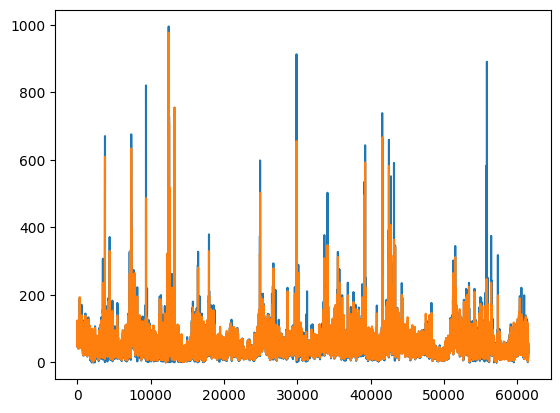

In [55]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9029435190315924


In [57]:
import joblib
joblib.dump(model, 'Punjab_PM2.5_µgm³.pkl')

['Punjab_PM2.5_µgm³.pkl']

In [58]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
pred_check2 = model.predict(X)

In [60]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.8509589367361787


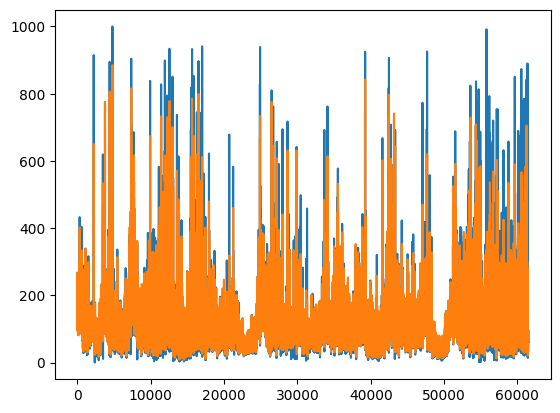

In [61]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [62]:
joblib.dump(model, 'Punjab_PM10_µgm³.pkl')

['Punjab_PM10_µgm³.pkl']